In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

# Data Loading

In [2]:
app_df = pd.read_csv('/kaggle/input/credit-card-approval-prediction/application_record.csv')
credit_df = pd.read_csv("/kaggle/input/credit-card-approval-prediction/credit_record.csv")

In [3]:
app_df.shape, credit_df.shape

((438557, 18), (1048575, 3))

In [4]:
credit_df["DEFAULT"] = credit_df["STATUS"].apply(lambda x:0 if x in ["C", "X"] else 1)

# Merge the two datasets inner join

In [5]:
df = app_df.merge(credit_df, on = "ID", how = "inner")

In [6]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,DEFAULT
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,0,C,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-1,C,0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-2,C,0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-3,C,0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-4,C,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

# Missing Values

In [8]:
df["OCCUPATION_TYPE"].fillna("Missing", inplace = True)

In [9]:
df.drop("STATUS", axis = 1, inplace = True)

# EDA

In [10]:
X = df.iloc[:,:-1].drop("ID", axis = 1)
y = df["DEFAULT"].astype("category")
X.head()


,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Missing,2.0,0
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Missing,2.0,-1
2,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Missing,2.0,-2
3,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Missing,2.0,-3
4,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Missing,2.0,-4


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          777715 non-null  object 
 1   FLAG_OWN_CAR         777715 non-null  object 
 2   FLAG_OWN_REALTY      777715 non-null  object 
 3   CNT_CHILDREN         777715 non-null  int64  
 4   AMT_INCOME_TOTAL     777715 non-null  float64
 5   NAME_INCOME_TYPE     777715 non-null  object 
 6   NAME_EDUCATION_TYPE  777715 non-null  object 
 7   NAME_FAMILY_STATUS   777715 non-null  object 
 8   NAME_HOUSING_TYPE    777715 non-null  object 
 9   DAYS_BIRTH           777715 non-null  int64  
 10  DAYS_EMPLOYED        777715 non-null  int64  
 11  FLAG_MOBIL           777715 non-null  int64  
 12  FLAG_WORK_PHONE      777715 non-null  int64  
 13  FLAG_PHONE           777715 non-null  int64  
 14  FLAG_EMAIL           777715 non-null  int64  
 15  OCCUPATION_TYPE  

In [12]:
cat_cols = list(X.select_dtypes("O").columns)
num_cols = []
extend_cat_cols = []
for col in X.columns:
    print(col)
    if (len(X[col].unique()) > 3) and (col not in cat_cols):
        num_cols.append(col)
    else:
        extend_cat_cols.append(col)
cat_cols.extend(extend_cat_cols)
cat_cols

CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
DAYS_BIRTH
DAYS_EMPLOYED
FLAG_MOBIL
FLAG_WORK_PHONE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
MONTHS_BALANCE


['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE']

In [13]:
num_cols

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'CNT_FAM_MEMBERS',
 'MONTHS_BALANCE']

In [14]:
# for col in num_cols:
    # X[col] = X[col].apply(lambda x: x if x>0 else -1 * x)

In [15]:
df_pair = X.copy()

df_pair["Default"] = y


# Heat map of numeric columns

<AxesSubplot:>

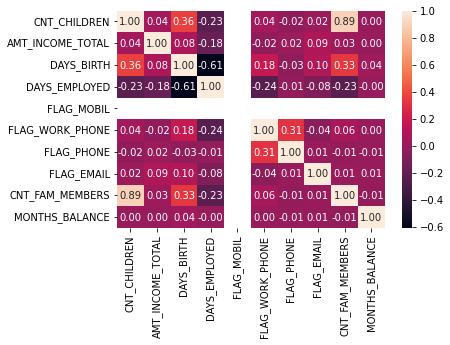

In [16]:
sns.heatmap(df_pair.corr(), fmt = "0.2f", annot = True)

# Categorical Variables EDA

In [18]:
for col in cat_cols:
    print(col)
    print(pd.crosstab(X[col],y))
    print("--------------------------------------")

CODE_GENDER
DEFAULT           0       1
CODE_GENDER                
F            316734  202117
M            158752  100112
--------------------------------------
FLAG_OWN_CAR
DEFAULT            0       1
FLAG_OWN_CAR                
N             289536  183819
Y             185950  118410
--------------------------------------
FLAG_OWN_REALTY
DEFAULT               0       1
FLAG_OWN_REALTY                
N                162167  102600
Y                313319  199629
--------------------------------------
NAME_INCOME_TYPE
DEFAULT                    0       1
NAME_INCOME_TYPE                    
Commercial associate  110818   72567
Pensioner              78894   49498
State servant          39906   25531
Student                  269      68
Working               245599  154565
--------------------------------------
NAME_EDUCATION_TYPE
DEFAULT                             0       1
NAME_EDUCATION_TYPE                          
Academic degree                   621     216
Higher educat

In [19]:
y.value_counts()

0    475486
1    302229
Name: DEFAULT, dtype: int64

# Outlier detection

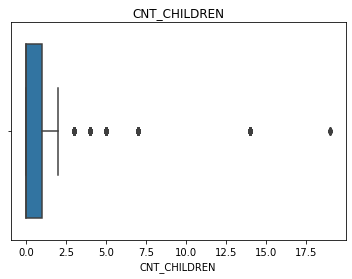

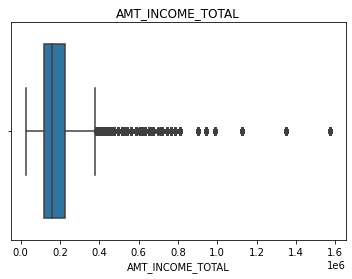

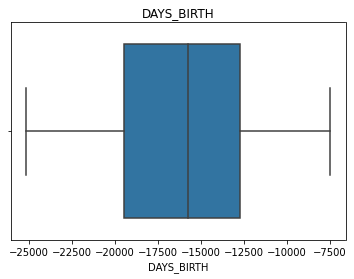

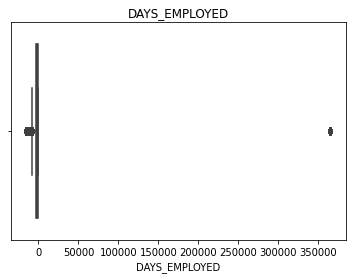

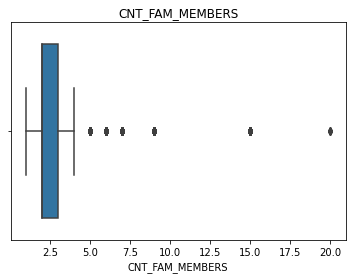

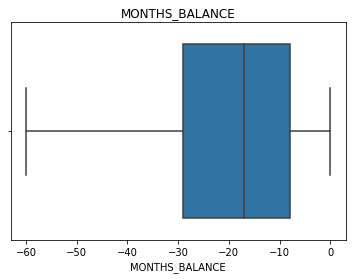

In [20]:
for col in num_cols:
    sns.boxplot(X[col])
    plt.title(col)
    plt.show()

# Data Preprocessing

## Train test split

In [21]:
for col in num_cols:
    X[col] = X[col].apply(lambda x: x if x>0 else -1*x)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Categorical columns

In [23]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False)
X_train_cat = ohe.fit_transform(X_train[cat_cols])

# Combine column names for each categorical column
col_names = []
for i, col in enumerate(cat_cols):
    col_names.extend([f"{col}_{cat}" for cat in ohe.categories_[i]])

# Convert the result to a DataFrame with the new column names
X_train_cat_df = pd.DataFrame(X_train_cat, columns=col_names, index = X_train.index)

X_test_cat  = ohe.transform(X_test[cat_cols])
X_test_cat_df = pd.DataFrame(X_test_cat, columns=col_names, index = X_test.index)

In [24]:
X_train_cat_df = X_train_cat_df.loc[:, ~X_train_cat_df.columns.duplicated()]
X_test_cat_df = X_test_cat_df.loc[:, ~X_test_cat_df.columns.duplicated()]


## Numeric columns

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])

X_test[num_cols] = scaler.transform(X_test[num_cols])

In [26]:
scaler.data_max_

array([1.90000e+01, 1.57500e+06, 2.51520e+04, 3.65243e+05, 2.00000e+01,
       6.00000e+01])

In [27]:
print(X_train_cat_df.shape, X_train[num_cols].shape)

(544400, 53) (544400, 6)


In [28]:
X_train = pd.concat([X_train_cat_df, X_train[num_cols]], axis = 1)
X_test = pd.concat([X_test_cat_df, X_test[num_cols]], axis = 1)

# XGBClassification Model

In [29]:
xgb = XGBClassifier(random_state = 42)
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)

[18:04:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


# Evaluation Metrics

In [30]:
print("F1 score: ",f1_score(preds, y_test))
print("Precision Score: ", precision_score(preds, y_test))
print("Recall Score: ", recall_score(preds, y_test))

F1 score:  0.4601955619056124
Precision Score:  0.34155528554070475
Recall Score:  0.7051217732372526


# Hyper paramter tuning XGBClassifier

In [31]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)

# Define the hyperparameters to search
param_grid = {
    'learning_rate': [0.05, 0.1],
    'max_depth': [5, 7],
    'colsample_bytree': [0.6, 1.0],
    'gamma': [0.1, 0.2]
}

# Set up GridSearchCV with F1 score as the metric to optimize
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='f1', verbose=1, n_jobs = -1)

grid_search.fit(X_train, y_train)

# Best parameters from grid search
print(grid_search.best_params_)

# Use the best model
best_xgb = grid_search.best_estimator_
preds = best_xgb.predict(X_test)

# Evaluate the performance

print("Precision: ", precision_score(y_test, preds))
print("Recall: ", recall_score(y_test, preds))
print("F1 Score: ", f1_score(y_test, preds))


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 39.9min finished


[18:45:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 7}
Precision:  0.6890766630818866
Recall:  0.24771898818071358
F1 Score:  0.36442819419053424
[18:05:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:07:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:09:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the 

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:05:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:07:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:10:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:14:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:05:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:08:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:10:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:14:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:05:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:07:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:10:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:14:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [36]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict probabilities
pred_probs = best_xgb.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Initialize lists to store precision, recall, and F1 score
precisions, recalls, f1_scores = [], [], []

# Iterate through different thresholds from 0 to 1 with small steps
thresholds = np.arange(0.2, 0.31, 0.01)

for threshold in thresholds:
    # Apply threshold to get predicted labels
    preds_adjusted = (pred_probs > threshold).astype(int)
    
    # Calculate precision, recall, and F1 score
    precision = precision_score(y_test, preds_adjusted)
    recall = recall_score(y_test, preds_adjusted)
    f1 = f1_score(y_test, preds_adjusted)
    
    # Store values
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Create a DataFrame for easy visualization
import pandas as pd
threshold_df = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Show the results
print(threshold_df)


    Threshold  Precision    Recall  F1 Score
0        0.20   0.391449  0.998940  0.562481
1        0.21   0.392450  0.998222  0.563400
2        0.22   0.393657  0.997084  0.564461
3        0.23   0.395303  0.995659  0.565921
4        0.24   0.397396  0.993328  0.567682
5        0.25   0.400271  0.989981  0.570056
6        0.26   0.403590  0.985651  0.572686
7        0.27   0.408391  0.978416  0.576254
8        0.28   0.414606  0.966829  0.580343
9        0.29   0.421416  0.951000  0.584031
10       0.30   0.430413  0.930763  0.588627


In [37]:
# Predict probabilities
pred_probs = best_xgb.predict_proba(X_test)[:, 1]

# Lower threshold to improve recall
threshold = 0.3  #Selected from above
preds_adjusted = (pred_probs > threshold).astype(int)

# Evaluate performance
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision: ", precision_score(y_test, preds_adjusted))
print("Recall: ", recall_score(y_test, preds_adjusted))
print("F1 Score: ", f1_score(y_test, preds_adjusted))


Precision:  0.4304132400265618
Recall:  0.9307632828896498
F1 Score:  0.5886273140062871
